<a href="https://colab.research.google.com/github/Biswamitra4599/MRI_Literature_Review/blob/main/MRI_Literature_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [80]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00


In [11]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [35]:
# Open the Google Sheet by its name

spreadsheet_name = 'MRI Literature Reviews'
worksheet_name = 'Stats'

spreadsheet = gc.open(spreadsheet_name)
worksheet = spreadsheet.worksheet(worksheet_name)

In [36]:
# Get all values and convert to a Pandas DataFrame
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

df.columns = df.iloc[0]
df = df.iloc[1:]
print(df.head())

0 INDEX                                              Paper     Type  \
1     1                                            BGRAPPA  K space   
2     2  Deep learning MRI halves scan time…” — more ge...  K space   
3     3                            Zero-Shot Diffusion MRI  K space   
4     4               Diffusion Posterior Sampling for MRI  K space   
5     5  Deep Learning Superresolution for Simultaneous...  K space   

0     Model type     Metrics Used Type of MRI Orientation Year   \
1    Statistical     MSE, T-STATS          T2       Axial  2025   
2  Deep Learning              SNR          T2       Axial  2025   
3  Deep Learning  MSE, PSNR, SSIM          NA       Axial  2025   
4  Deep Learning                           NA          NA  2025   
5  Deep Learning     AC2, P-Value  PD, FS, T2          NA  2025   

0 Published Place                            Body Parts Quality  
1             AAS                                 Brain      Q1  
2              RA  Brain, Spine, Mussl

In [37]:
df = df.drop(columns=['Paper'])
df.head()

,INDEX,Type,Model type,Metrics Used,Type of MRI,Orientation,Year,Published Place,Body Parts,Quality
1,1,K space,Statistical,"MSE, T-STATS",T2,Axial,2025,AAS,Brain,Q1
2,2,K space,Deep Learning,SNR,T2,Axial,2025,RA,"Brain, Spine, Mussles, Others, Knee",NA
3,3,K space,Deep Learning,"MSE, PSNR, SSIM",NA,Axial,2025,NRMB,Cardiac,Q1
4,4,K space,Deep Learning,,NA,NA,2025,IPI,,Q2
5,5,K space,Deep Learning,"AC2, P-Value","PD, FS, T2",NA,2025,R,Knee,Q1


In [38]:
def convert_to_list(text):
    if isinstance(text, str) and text.strip():
        return [item.strip() for item in text.split(',')]
    return ['Missing']

In [39]:
df['Model type'] = df['Model type'].apply(convert_to_list)
df['Metrics Used'] = df['Metrics Used'].apply(convert_to_list)
df['Type of MRI'] = df['Type of MRI'].apply(convert_to_list)
df['Orientation'] = df['Orientation'].apply(convert_to_list)
df['Body Parts'] = df['Body Parts'].apply(convert_to_list)

df['Type'] = df['Type'].apply(convert_to_list)
df['Year'] = df['Year '].apply(convert_to_list) # Corrected column name to 'Year '
df['Published Place'] = df['Published Place'].apply(convert_to_list)
df['Quality'] = df['Quality'].apply(convert_to_list)


In [40]:
df.head()

,INDEX,Type,Model type,Metrics Used,Type of MRI,Orientation,Year,Published Place,Body Parts,Quality,Year
1,1,[K space],[Statistical],"[MSE, T-STATS]",[T2],[Axial],2025,[AAS],[Brain],[Q1],[2025]
2,2,[K space],[Deep Learning],[SNR],[T2],[Axial],2025,[RA],"[Brain, Spine, Mussles, Others, Knee]",[NA],[2025]
3,3,[K space],[Deep Learning],"[MSE, PSNR, SSIM]",[NA],[Axial],2025,[NRMB],[Cardiac],[Q1],[2025]
4,4,[K space],[Deep Learning],[Missing],[NA],[NA],2025,[IPI],[Missing],[Q2],[2025]
5,5,[K space],[Deep Learning],"[AC2, P-Value]","[PD, FS, T2]",[NA],2025,[R],[Knee],[Q1],[2025]


In [41]:
# Define the columns for which unique lists are needed
columns_to_get_unique = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Year', 'Published Place', 'Body Parts', 'Quality'
]

# Print unique lists for each specified column
for col in columns_to_get_unique:
    try:
        # Explode the list column into separate rows, then get unique values
        unique_items = df[col].explode().unique().tolist()
        print(f"Unique list for '{col}': {sorted(unique_items)}") # Sorting for consistent output
    except AttributeError:
        print(f"Error processing column '{col}': Ensure all entries are lists after conversion.")
        unique_items = df[col].unique().tolist()
        print(f"Unique list (without explode) for '{col}': {sorted(unique_items)}")

Unique list for 'Type': ['I-space', 'K space', 'K-I space', 'Missing']
Unique list for 'Model type': ['Deep Learning', 'Machine Learning', 'Missing', 'Statistical', 'Traditional']
Unique list for 'Metrics Used': ['', 'AC2', 'Accuracy', 'Adversarial Loss', 'Aliasing', 'Artifact-Power', 'Blurring', 'CNR', 'CRLB', 'Coherence', 'Computation Time', 'Cross Entropy Loss', 'Dice and HD Score', 'FID', 'FSIM', 'FWHM', 'G-factor', 'L1-Norm', 'L1-norm', 'L2-norm', 'LAP', 'LPIPS', 'MAC', 'MAE', 'MS-GMSD', 'MS-SSIM', 'MSE', 'MSSIM', 'Missing', 'NMSE', 'NQM', 'NRMSE', 'NRMSR', 'Nuclear Norm', 'P-Value', 'PSNR', 'QVA', 'RLNE', 'RMSE', 'Runtime', 'SNR', 'SSIM', 'SSIM MSE', 'SSIM NMSE PSNR', 'SSIM and LPIPS', 'SSIM. NRMSE', 'Sensitivity', 'Sharpness-Score', 'Specificity', 'T-STATS', 'T1', 'TPSF', 'Time to acquire', 'VIF', 'Vassel Lenght', 'and PSNR', 'geometry factor', 'nRMSE', 'nRMSEs', 'rSNR', 'reconstruction error', 'tSNR']
Unique list for 'Type of MRI': ['CE', 'FS', 'Flair', 'Missing', 'NA', 'PD', '

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


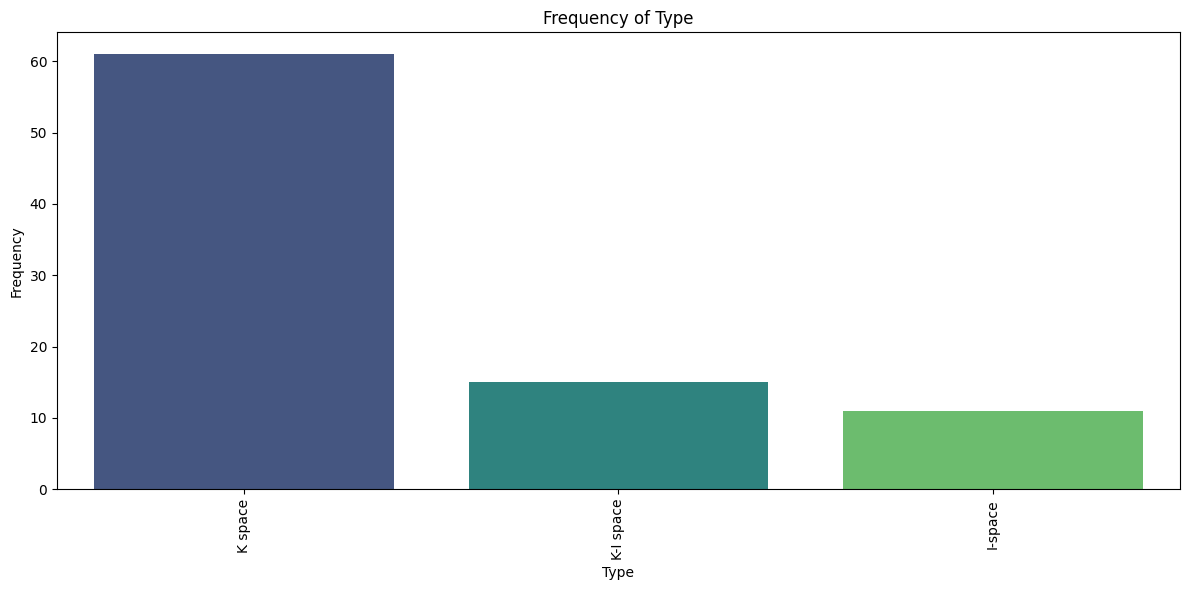

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


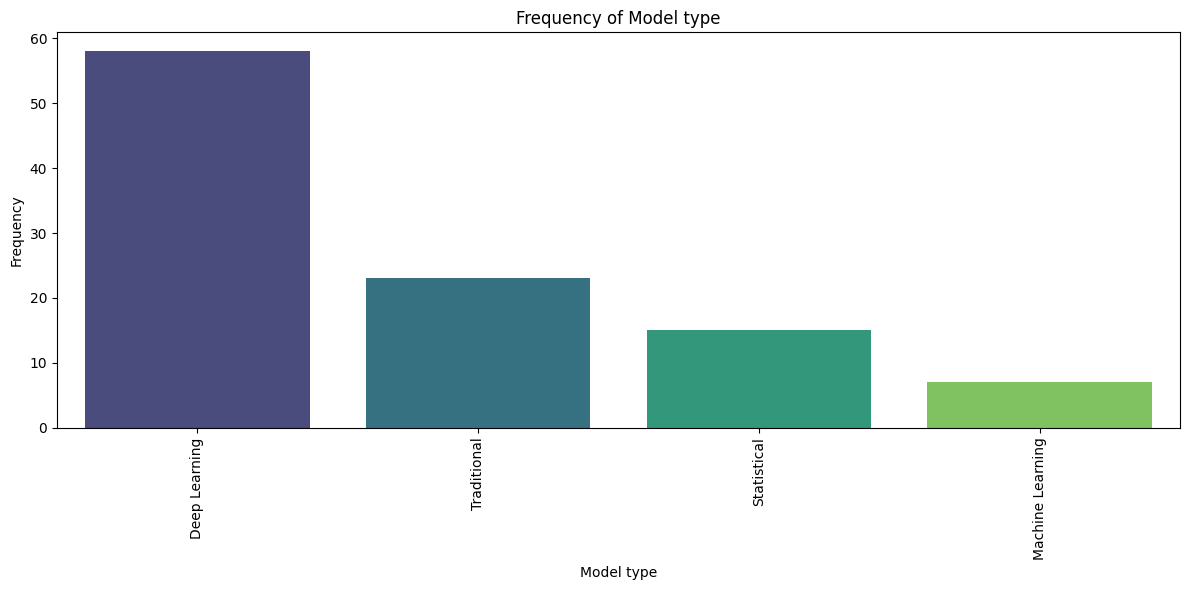

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


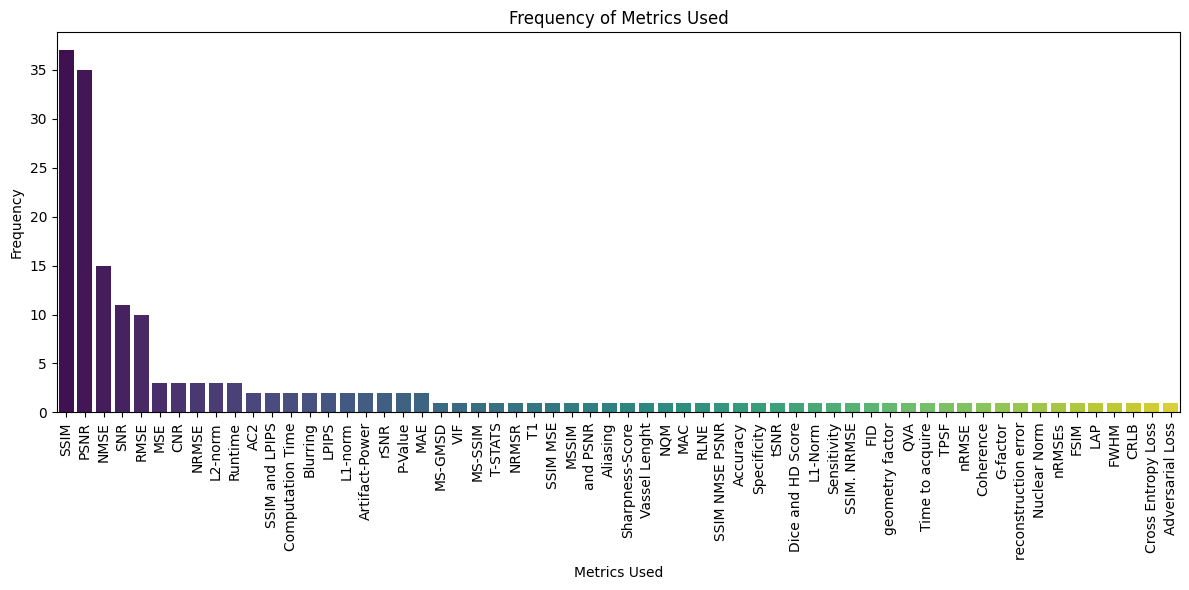

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


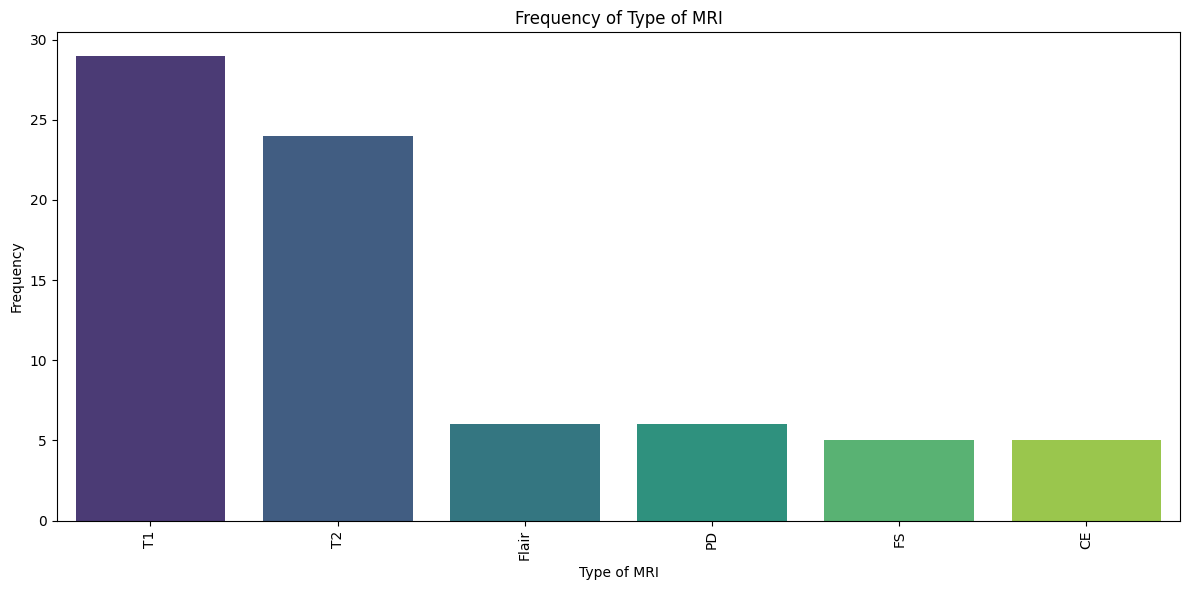

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


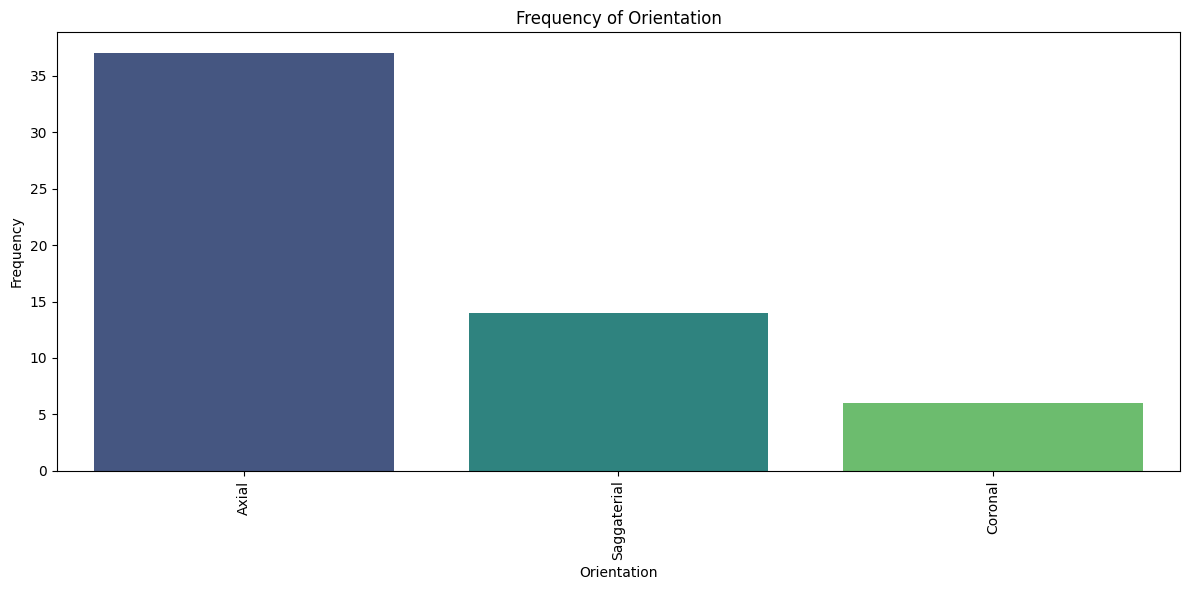

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


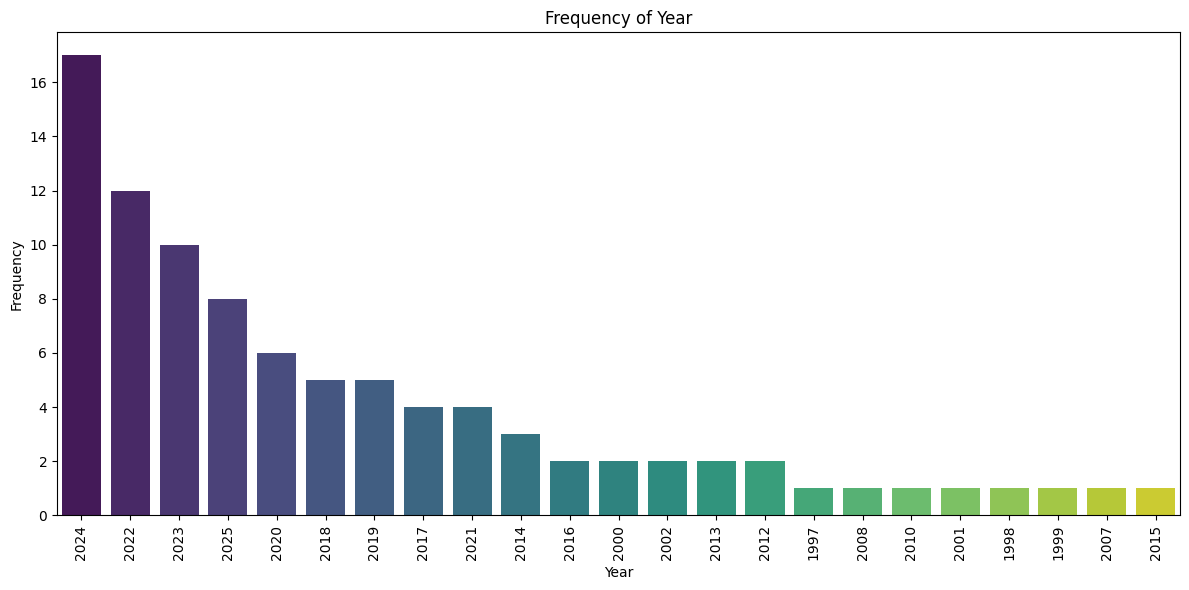

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


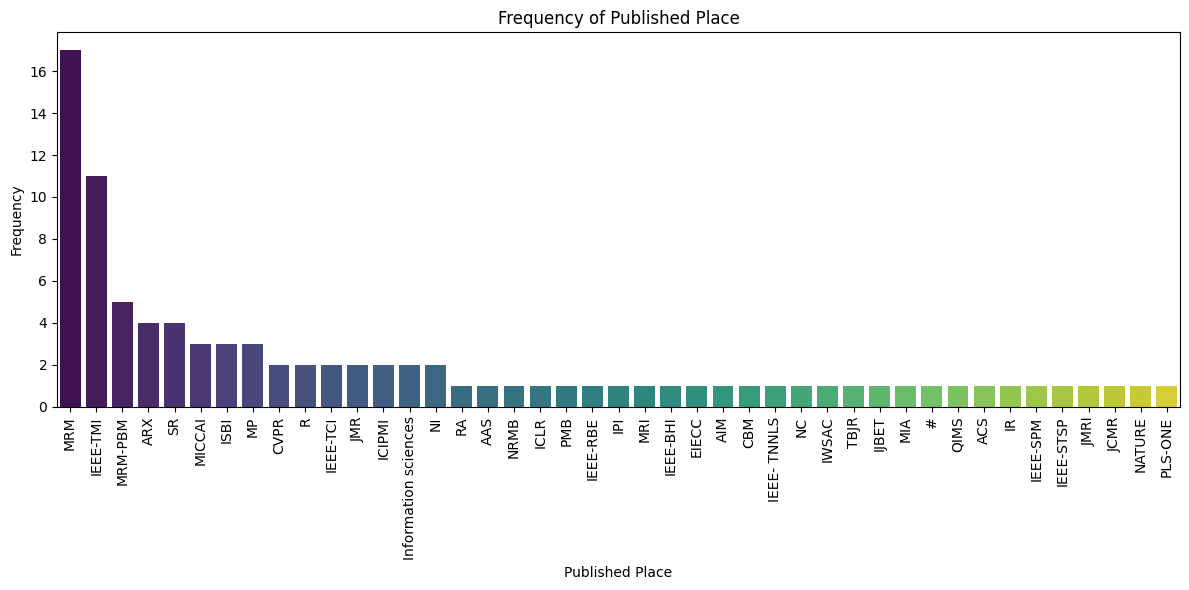

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


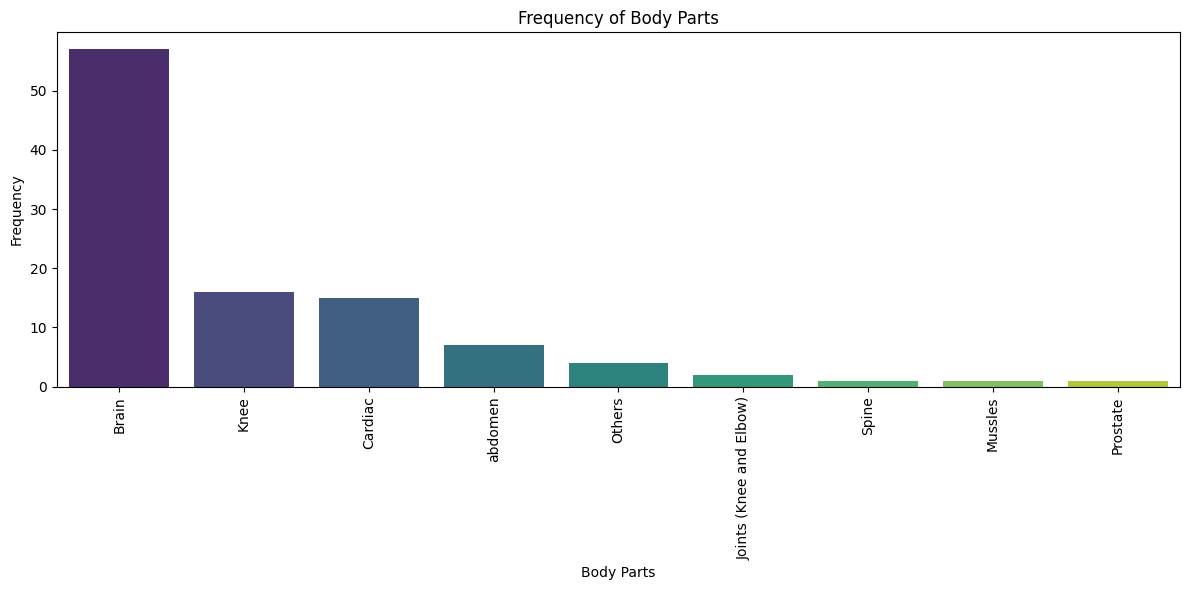

/tmp/ipython-input-2929848400.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


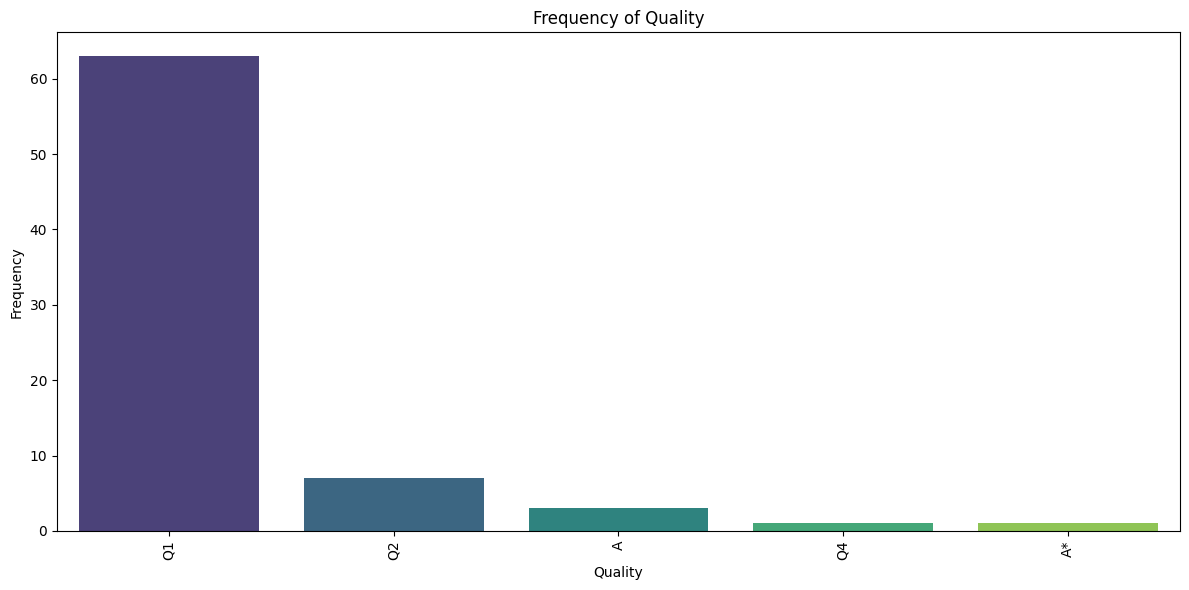

In [49]:
columns_to_plot = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Year', 'Published Place', 'Body Parts', 'Quality'
]

for col in columns_to_plot:
    # Explode the list column to get individual items
    exploded_series = df[col].explode()

    # Count the frequency of each item
    frequencies = exploded_series.value_counts()

    # Filter out empty string or 'Missing' if they are not meaningful for plotting
    if '' in frequencies.index:
        frequencies = frequencies.drop('')
    if 'Missing' in frequencies.index:
        frequencies = frequencies.drop('Missing')
    if 'NA' in frequencies.index:
        frequencies = frequencies.drop('NA')

    if not frequencies.empty:
        # Create a bar plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No meaningful data to plot for column: {col} after filtering 'Missing' or empty values.")

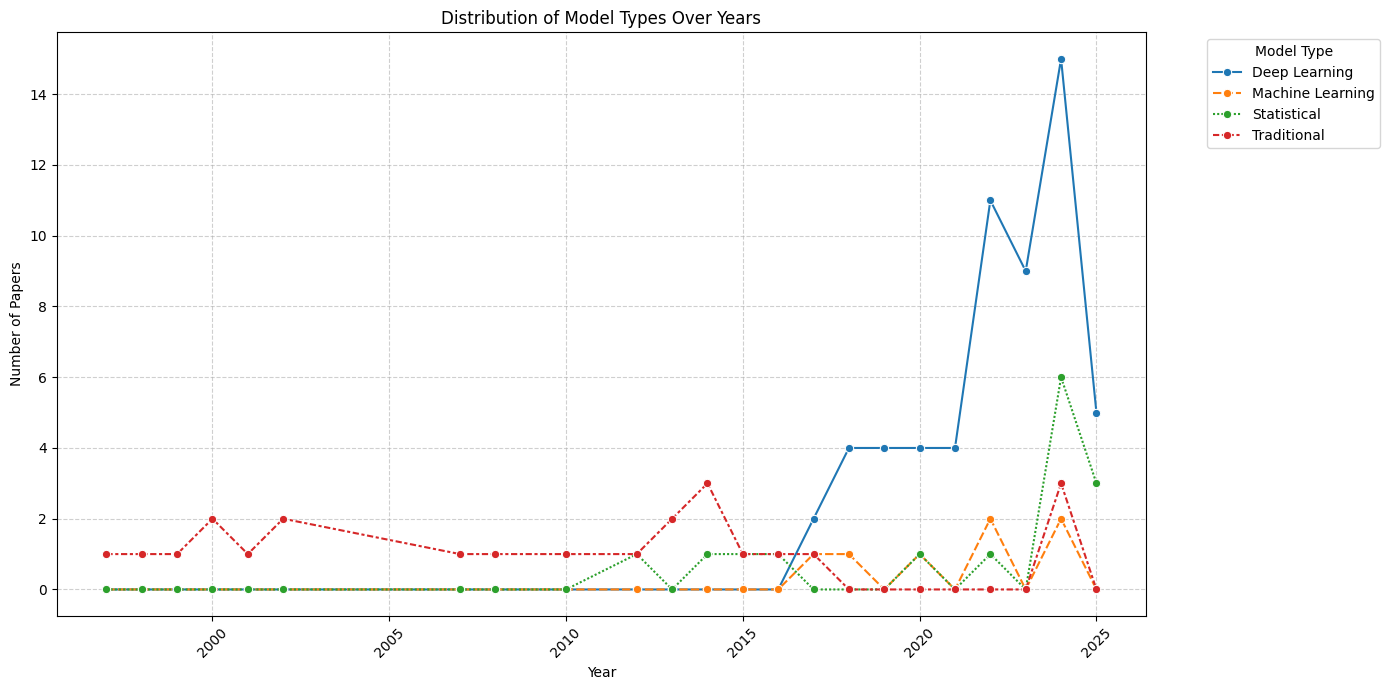

In [50]:
# Explode 'Year' and 'Model type' columns
df_exploded_year = df.explode('Year')
df_exploded_model = df_exploded_year.explode('Model type')

# Convert 'Year' to numeric, handling potential errors
df_exploded_model['Year'] = pd.to_numeric(df_exploded_model['Year'], errors='coerce')

# Filter out 'Missing' or NaN values from 'Model type' and 'Year'
df_plot = df_exploded_model[df_exploded_model['Model type'] != 'Missing']
df_plot = df_plot.dropna(subset=['Year'])

# Group by Year and Model type and count occurrences
model_type_by_year = df_plot.groupby(['Year', 'Model type']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=model_type_by_year, marker='o')
plt.title('Distribution of Model Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Task
To perform co-occurrence analysis, I will first define a function `generate_cooccurrence_matrix` that takes a DataFrame and a column name as input. This function will calculate the frequency of item pairs appearing together within the lists of that column. Then, I will apply this function to the identified relevant columns: 'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Published Place', 'Body Parts', and 'Quality'. Finally, I will display the resulting co-occurrence matrices.

This will show how frequently different items within the same category appear together, providing insights into their relationships.

```python
from itertools import combinations
import pandas as pd

def generate_cooccurrence_matrix(df, column_name):
    """
    Generates a co-occurrence matrix for items within lists in a specified DataFrame column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing lists of items.

    Returns:
        pd.DataFrame: The co-occurrence matrix.
    """
    # Collect all unique items, filtering out 'Missing', 'NA', and empty strings
    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    # Initialize an empty co-occurrence matrix with unique items as index and columns
    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    # Iterate through each row's list to count co-occurrences
    for item_list in df[column_name]:
        # Filter items in the current list
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA']]

        # Count self-occurrences
        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        # Count co-occurrences for pairs
        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1 # Symmetrical matrix

    return cooccurrence_matrix

# Columns identified for co-occurrence analysis, excluding 'Year'
co_occurrence_columns = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Published Place', 'Body Parts', 'Quality'
]

# Dictionary to store all generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
for col in co_occurrence_columns:
    print(f"Generating co-occurrence matrix for '{col}'...")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Display the generated co-occurrence matrices
for col_name, matrix in cooccurrence_matrices.items():
    print(f"\n--- Co-occurrence Matrix for '{col_name}' ---")
    print(matrix)
    print("-" * (len(f"--- Co-occurrence Matrix for '{col_name}' ---")))

```

In [70]:
df.head()

,INDEX,Type,Model type,Metrics Used,Type of MRI,Orientation,Year,Published Place,Body Parts,Quality,Year
1,1,[K space],[Statistical],"[MSE, T-STATS]",[T2],[Axial],2025,[AAS],[Brain],[Q1],[2025]
2,2,[K space],[Deep Learning],[SNR],[T2],[Axial],2025,[RA],"[Brain, Spine, Mussles, Others, Knee]",[NA],[2025]
3,3,[K space],[Deep Learning],"[MSE, PSNR, SSIM]",[NA],[Axial],2025,[NRMB],[Cardiac],[Q1],[2025]
4,4,[K space],[Deep Learning],[Missing],[NA],[NA],2025,[IPI],[Missing],[Q2],[2025]
5,5,[K space],[Deep Learning],"[AC2, P-Value]","[PD, FS, T2]",[NA],2025,[R],[Knee],[Q1],[2025]


In [59]:
co_occurrence_columns = [
    'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Body Parts'
]

print("Columns identified for co-occurrence analysis:")
for col in co_occurrence_columns:
    print(f"- {col}")

Columns identified for co-occurrence analysis:
- Model type
- Metrics Used
- Type of MRI
- Orientation
- Body Parts


**Reasoning**:
I will define the `generate_cooccurrence_matrix` function as described in the task's planning, then iterate through the identified `co_occurrence_columns` to generate and store the co-occurrence matrices. Finally, I will display each generated matrix.



In [60]:
from itertools import combinations

def generate_cooccurrence_matrix(df, column_name):
    """
    Generates a co-occurrence matrix for items within lists in a specified DataFrame column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing lists of items.

    Returns:
        pd.DataFrame: The co-occurrence matrix.
    """
    # Collect all unique items, filtering out 'Missing', 'NA', and empty strings
    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    # Initialize an empty co-occurrence matrix with unique items as index and columns
    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    # Iterate through each row's list to count co-occurrences
    for item_list in df[column_name]:
        # Filter items in the current list
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA']]

        # Count self-occurrences
        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        # Count co-occurrences for pairs
        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1 # Symmetrical matrix

    return cooccurrence_matrix

# Dictionary to store all generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
for col in co_occurrence_columns:
    print(f"Generating co-occurrence matrix for '{col}'...")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Display the generated co-occurrence matrices
for col_name, matrix in cooccurrence_matrices.items():
    print(f"\n--- Co-occurrence Matrix for '{col_name}' ---")
    print(matrix)
    print("-" * (len(f"--- Co-occurrence Matrix for '{col_name}' ---")))

Generating co-occurrence matrix for 'Model type'...
Co-occurrence matrix for 'Model type' generated successfully.
Generating co-occurrence matrix for 'Metrics Used'...
Co-occurrence matrix for 'Metrics Used' generated successfully.
Generating co-occurrence matrix for 'Type of MRI'...
Co-occurrence matrix for 'Type of MRI' generated successfully.
Generating co-occurrence matrix for 'Orientation'...
Co-occurrence matrix for 'Orientation' generated successfully.
Generating co-occurrence matrix for 'Body Parts'...
Co-occurrence matrix for 'Body Parts' generated successfully.

--- Co-occurrence Matrix for 'Model type' ---
                  Deep Learning  Machine Learning  Statistical  Traditional
Deep Learning                58                 3            6            2
Machine Learning              3                 7            1            1
Statistical                   6                 1           15            3
Traditional                   2                 1            3         

## Generate matrices for each column

### Subtask:
Generate co-occurrence matrices for all specified columns including 'Type', 'Published Place', and 'Quality', and store them in a dictionary.


**Reasoning**:
The subtask requires generating co-occurrence matrices for an updated list of columns. I will redefine the `co_occurrence_columns` list to include 'Type', 'Published Place', and 'Quality', and then reuse the existing `generate_cooccurrence_matrix` function to generate and store the matrices in the `cooccurrence_matrices` dictionary.



In [63]:
from itertools import combinations

# Define the columns for co-occurrence analysis as per the new instructions
co_occurrence_columns = [
   'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Body Parts'
]

# Dictionary to store all generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
for col in co_occurrence_columns:
    print(f"Generating co-occurrence matrix for '{col}'...")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Display the generated co-occurrence matrices
for col_name, matrix in cooccurrence_matrices.items():
    print(f"\n--- Co-occurrence Matrix for '{col_name}' ---")
    print(matrix)
    print("-" * (len(f"--- Co-occurrence Matrix for '{col_name}' ---")))

Generating co-occurrence matrix for 'Model type'...
Co-occurrence matrix for 'Model type' generated successfully.
Generating co-occurrence matrix for 'Metrics Used'...
Co-occurrence matrix for 'Metrics Used' generated successfully.
Generating co-occurrence matrix for 'Type of MRI'...
Co-occurrence matrix for 'Type of MRI' generated successfully.
Generating co-occurrence matrix for 'Orientation'...
Co-occurrence matrix for 'Orientation' generated successfully.
Generating co-occurrence matrix for 'Body Parts'...
Co-occurrence matrix for 'Body Parts' generated successfully.

--- Co-occurrence Matrix for 'Model type' ---
                  Deep Learning  Machine Learning  Statistical  Traditional
Deep Learning                58                 3            6            2
Machine Learning              3                 7            1            1
Statistical                   6                 1           15            3
Traditional                   2                 1            3         

# Task
The previous step only generated co-occurrence matrices for a subset of the desired columns. To ensure a comprehensive analysis as outlined in the plan, I will first redefine `co_occurrence_columns` to include all relevant columns: 'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Published Place', 'Body Parts', and 'Quality'. Then, I will regenerate the co-occurrence matrices for this complete set. Finally, for each of these generated matrices, I will create and display a heatmap to visualize the co-occurrence patterns, providing a clear visual representation of relationships within each category.

This will complete the "Generate co-occurrence matrices" and "Generate and display heatmaps" steps of the overall plan.

```python
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import pandas as pd

# Define the columns for co-occurrence analysis as per the overall plan
co_occurrence_columns = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Published Place', 'Body Parts', 'Quality'
]

# The generate_cooccurrence_matrix function from earlier remains the same
def generate_cooccurrence_matrix(df, column_name):
    """
    Generates a co-occurrence matrix for items within lists in a specified DataFrame column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing lists of items.

    Returns:
        pd.DataFrame: The co-occurrence matrix.
    """
    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA', '']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    for item_list in df[column_name]:
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA', '']]

        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1

    return cooccurrence_matrix

# Dictionary to store all generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
print("--- Regenerating Co-occurrence Matrices for all specified columns ---")
for col in co_occurrence_columns:
    print(f"Generating co-occurrence matrix for '{col}'...")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Generate and display heatmaps for each co-occurrence matrix
print("\n--- Generating and Displaying Heatmaps ---")
for col_name, matrix in cooccurrence_matrices.items():
    if not matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5)
        plt.title(f'Co-occurrence Heatmap for {col_name}')
        plt.xlabel(f'Items in {col_name}')
        plt.ylabel(f'Items in {col_name}')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot generate heatmap for '{col_name}' as its co-occurrence matrix is empty.")

```

In [67]:
co_occurrence_columns = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Body Parts'
]

print("Columns identified for co-occurrence analysis:")
for col in co_occurrence_columns:
    print(f"- {col}")

Columns identified for co-occurrence analysis:
- Type
- Model type
- Metrics Used
- Type of MRI
- Orientation
- Body Parts


Generating co-occurrence matrices...
Processing column: 'Type'
Co-occurrence matrix for 'Type' generated successfully.
Processing column: 'Model type'
Co-occurrence matrix for 'Model type' generated successfully.
Processing column: 'Metrics Used'
Co-occurrence matrix for 'Metrics Used' generated successfully.
Processing column: 'Type of MRI'
Co-occurrence matrix for 'Type of MRI' generated successfully.
Processing column: 'Orientation'
Co-occurrence matrix for 'Orientation' generated successfully.
Processing column: 'Body Parts'
Co-occurrence matrix for 'Body Parts' generated successfully.

Generating and displaying heatmaps...


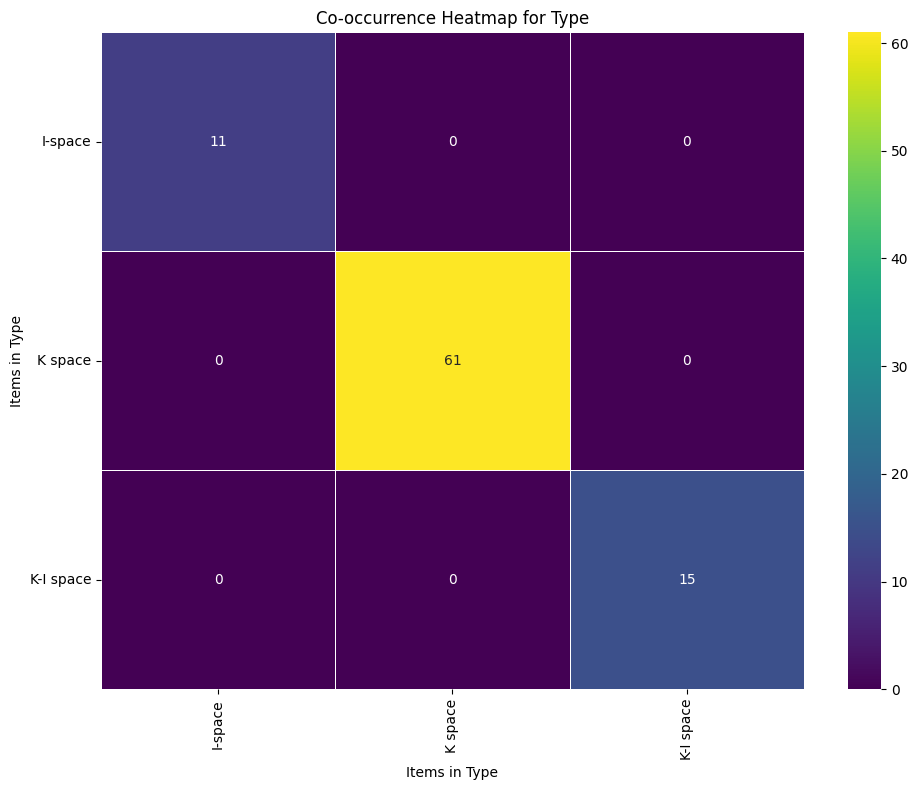

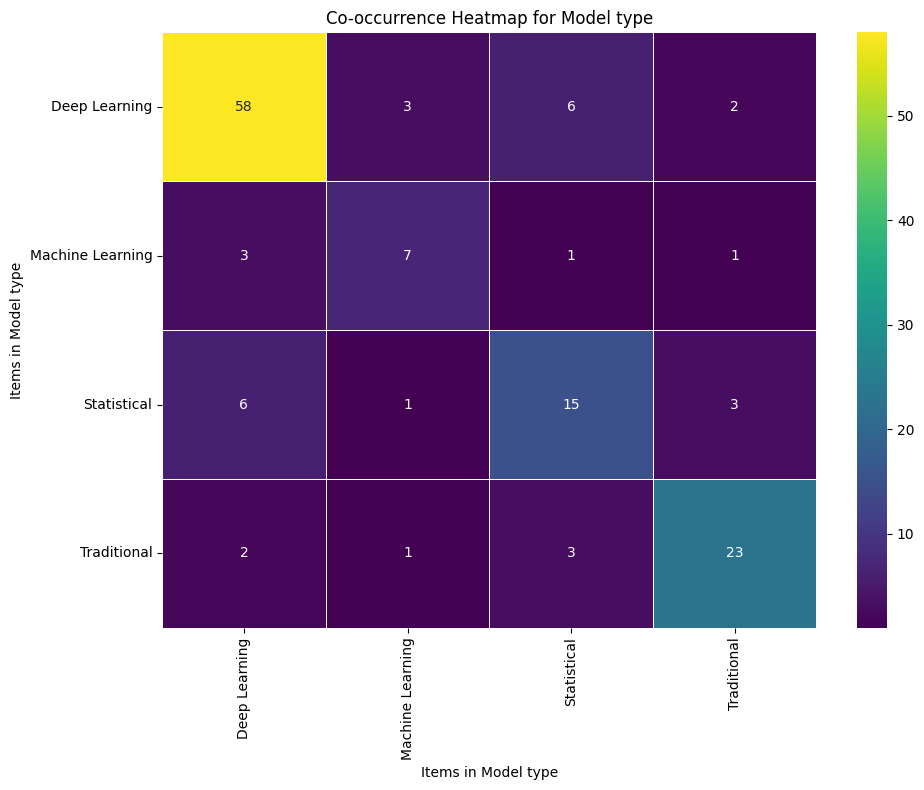

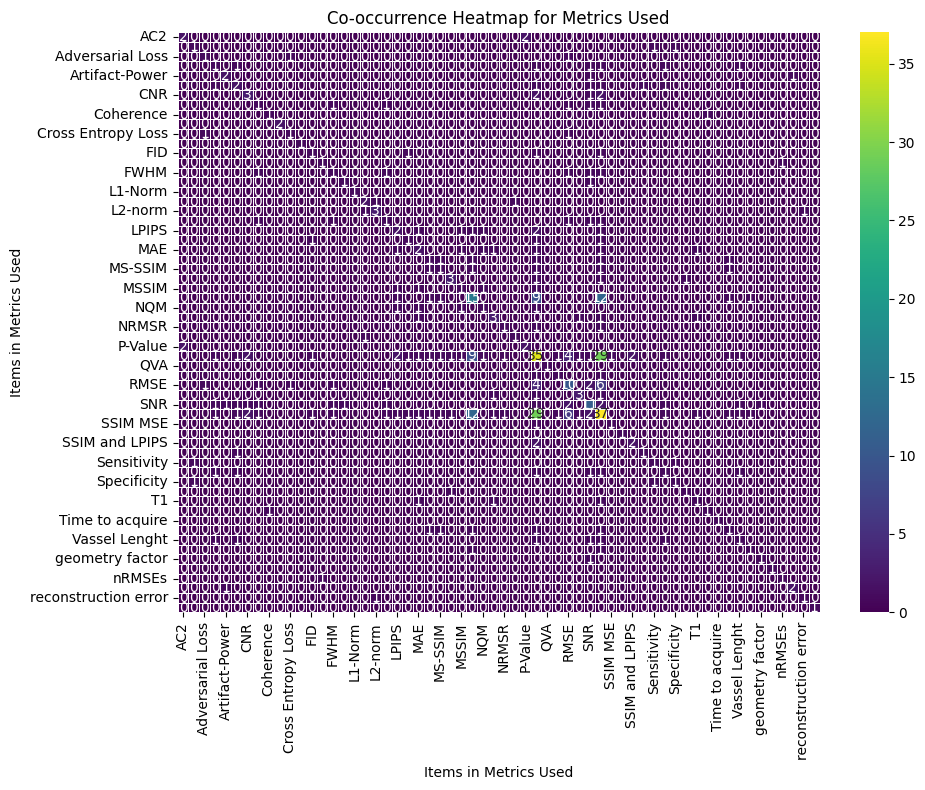

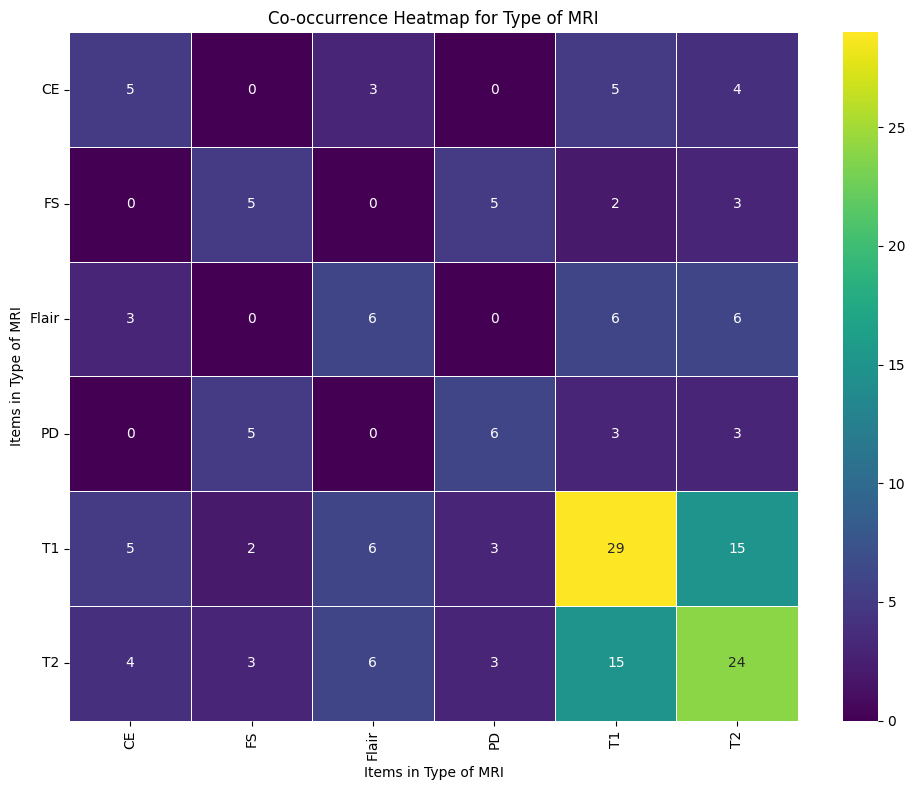

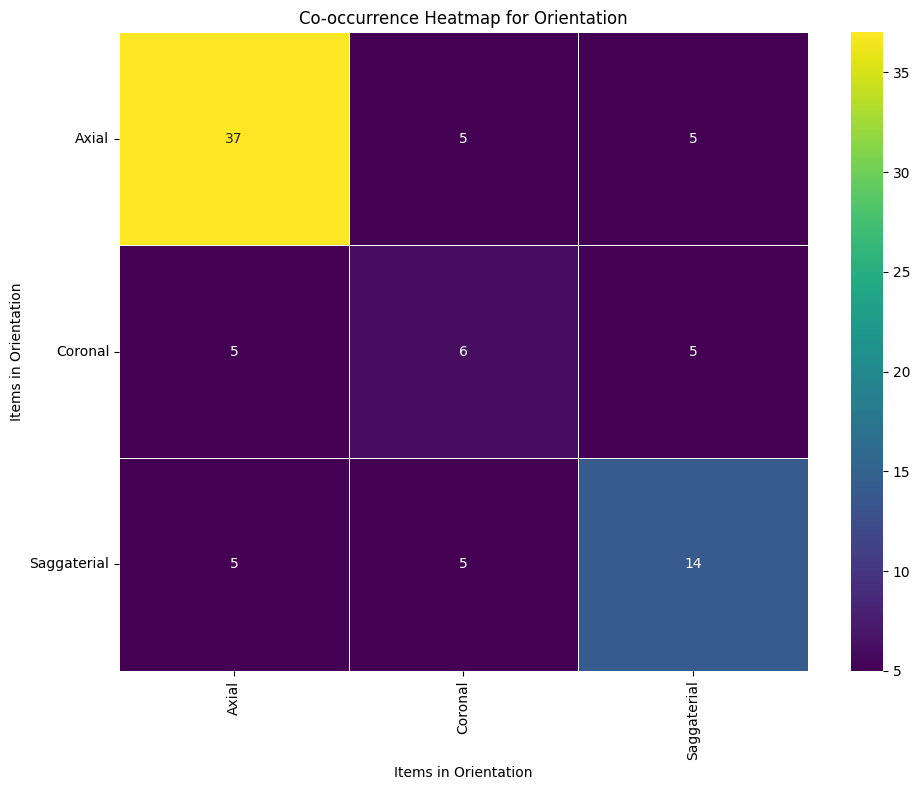

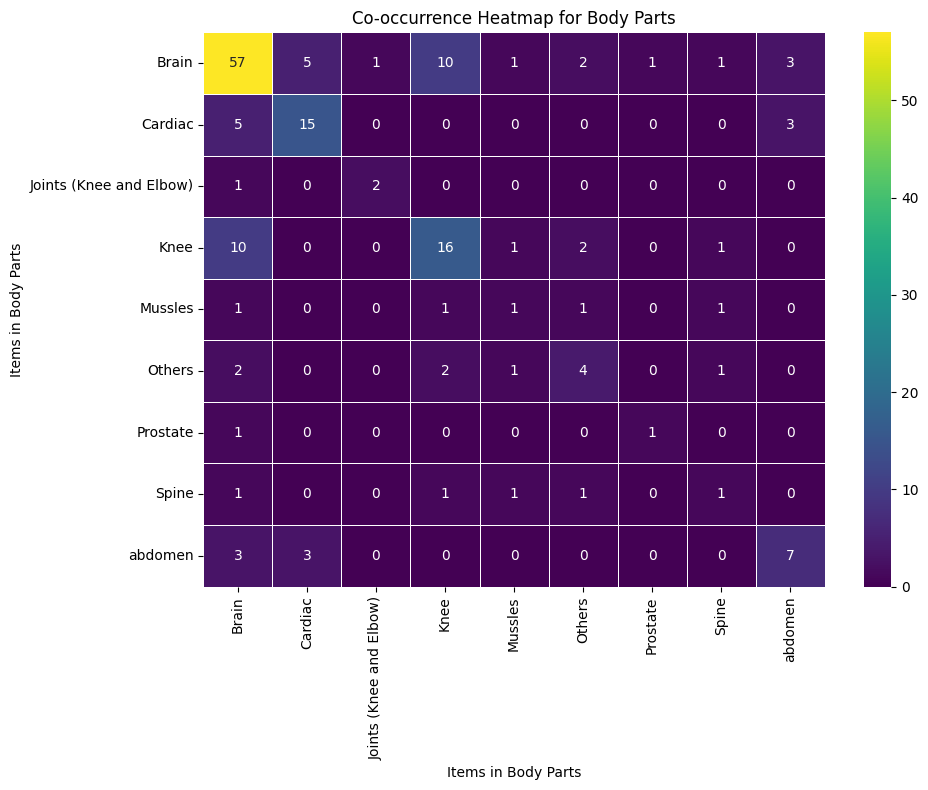

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import pandas as pd

# Define the generate_cooccurrence_matrix function
def generate_cooccurrence_matrix(df, column_name):
    # Collect all unique items, filtering out 'Missing', 'NA', and empty strings
    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA', '']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    # Initialize an empty co-occurrence matrix with unique items as index and columns
    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    # Iterate through each row's list to count co-occurrences
    for item_list in df[column_name]:
        # Filter items in the current list
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA', '']]

        # Count self-occurrences
        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        # Count co-occurrences for pairs
        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1 # Symmetrical matrix

    return cooccurrence_matrix

# Define the columns for co-occurrence analysis as per the instructions
co_occurrence_columns = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Body Parts'
]

# Initialize an empty dictionary to store the generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
print("Generating co-occurrence matrices...")
for col in co_occurrence_columns:
    print(f"Processing column: '{col}'")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Generate and display heatmaps for each co-occurrence matrix
print("\nGenerating and displaying heatmaps...")
for col_name, matrix in cooccurrence_matrices.items():
    if not matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5)
        plt.title(f'Co-occurrence Heatmap for {col_name}')
        plt.xlabel(f'Items in {col_name}')
        plt.ylabel(f'Items in {col_name}')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot generate heatmap for '{col_name}' as its co-occurrence matrix is empty.")


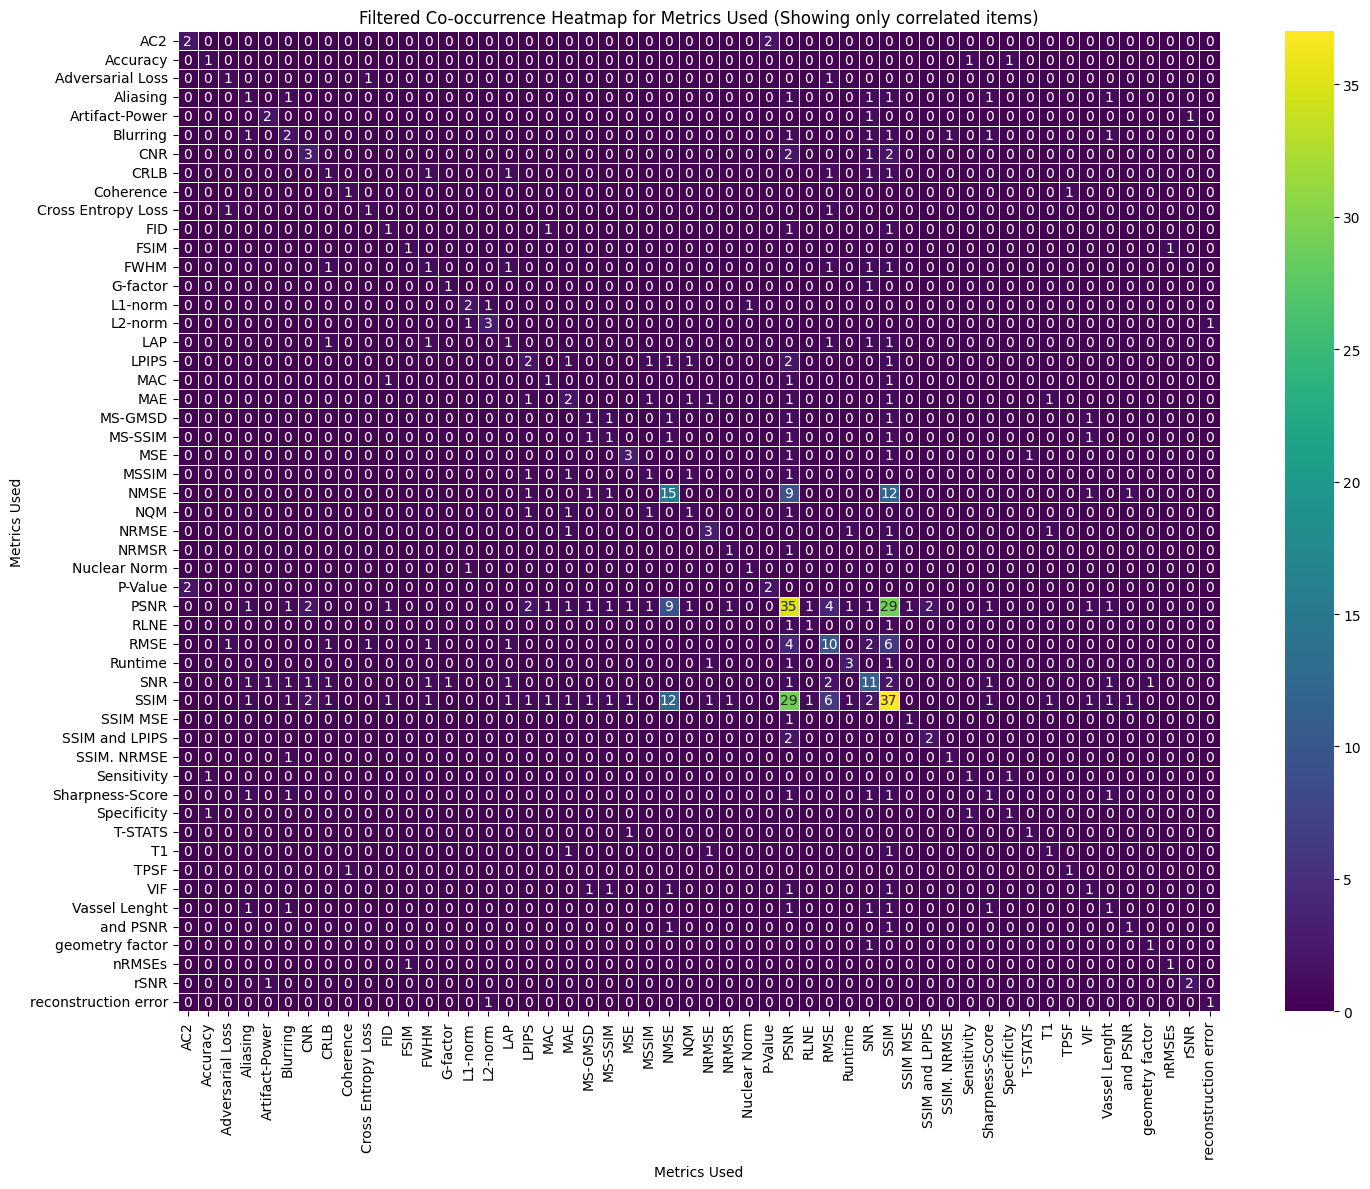

In [69]:
import numpy as np

# Get the co-occurrence matrix for 'Metrics Used'
metrics_matrix = cooccurrence_matrices['Metrics Used']

# Identify metrics that co-occur with at least one other metric
# Sum of off-diagonal elements for each row
# np.diag(metrics_matrix) returns the diagonal as a 1D array
# We need to ensure the diagonal is subtracted correctly from the sum of each row
has_other_cooccurrence = (metrics_matrix.sum(axis=1) - np.diag(metrics_matrix)).gt(0)

# Filter the matrix to include only these metrics (both rows and columns)
filtered_metrics_matrix = metrics_matrix.loc[has_other_cooccurrence, has_other_cooccurrence]

if not filtered_metrics_matrix.empty:
    plt.figure(figsize=(15, 12)) # Adjust figure size for better readability
    sns.heatmap(filtered_metrics_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5)
    plt.title('Filtered Co-occurrence Heatmap for Metrics Used (Showing only correlated items)')
    plt.xlabel('Metrics Used')
    plt.ylabel('Metrics Used')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No metrics found with co-occurrences with other distinct metrics after filtering.")

In [84]:
! pip install -U kaleido

In [86]:
import pandas as pd
import plotly.graph_objects as go
from itertools import combinations

import pandas as pd
import numpy as np

def fix_missing_general(df, cols):
    df = df.copy()

    for col in cols:

        def fix(x):

            # -------------------------------------------------------
            # Normalize non-list values into a list
            # -------------------------------------------------------
            if isinstance(x, list):
                items = x
            else:
                items = [x]

            cleaned = []
            for item in items:

                # Identify missing/NA/nan/empty
                if (
                    item in ["Missing", "NA", "N/A", None, "None"] or
                    item is pd.NA or
                    (isinstance(item, float) and pd.isna(item))
                ):
                    cleaned.append(f"Missing/NA ({col})")
                else:
                    cleaned.append(item)

            # If column was empty list → treat as missing too
            if cleaned == []:
                cleaned = [f"Missing/NA ({col})"]

            return cleaned

        df[col] = df[col].apply(fix)

    return df


# ---------------------------------------------------------
# Explode a pair of list-columns into weighted edges
# ---------------------------------------------------------
def explode_pairs(df, colA, colB):

    rows = []

    for _, row in df.iterrows():

        left_items = row[colA]
        right_items = row[colB]

        for l in left_items:
            for r in right_items:
                rows.append((l, r))

    df_pairs = pd.DataFrame(rows, columns=["source", "target"])
    df_weighted = df_pairs.groupby(["source", "target"]).size().reset_index(name="weight")

    return df_weighted


# ---------------------------------------------------------
# Build a weighted alluvial/Sankey diagram
# ---------------------------------------------------------
def make_alluvial(df_pairs, title):

    sources = df_pairs["source"].astype(str)
    targets = df_pairs["target"].astype(str)
    weights = df_pairs["weight"]

    combined = pd.concat([sources, targets])
    labels = list(pd.unique(combined))

    index_map = {label: idx for idx, label in enumerate(labels)}

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            label=labels,
            line=dict(width=1),
        ),
        link=dict(
            source=sources.map(index_map).tolist(),
            target=targets.map(index_map).tolist(),
            value=weights.tolist(),
        )
    )])

    fig.update_layout(title_text=title, font_size=12)
    fig.show()
    # ---------- SAVE PLOT ----------
    # filename = title.replace(" ", "_").replace("↔", "_to_")
    # fig.write_image(f"{filename}.png")
    # print(f"Saved: {filename}.png")


# ---------------------------------------------------------
# MAIN DRIVER
# ---------------------------------------------------------
co_occurrence_columns = [
    'Type',
    'Model type',
    'Type of MRI',
    'Orientation',
    'Body Parts'
]

# Fix missing
df = fix_missing_general(df, co_occurrence_columns)

# Generate alluvial for all pairs
for colA, colB in combinations(co_occurrence_columns, 2):
    print(f"Creating plot for {colA} ↔ {colB}")
    df_pairs = explode_pairs(df, colA, colB)
    make_alluvial(df_pairs, f"{colA} ↔ {colB} (Weighted Alluvial)")


Creating plot for Type ↔ Model type


Creating plot for Type ↔ Type of MRI


Creating plot for Type ↔ Orientation


Creating plot for Type ↔ Body Parts


Creating plot for Model type ↔ Type of MRI


Creating plot for Model type ↔ Orientation


Creating plot for Model type ↔ Body Parts


Creating plot for Type of MRI ↔ Orientation


Creating plot for Type of MRI ↔ Body Parts


Creating plot for Orientation ↔ Body Parts


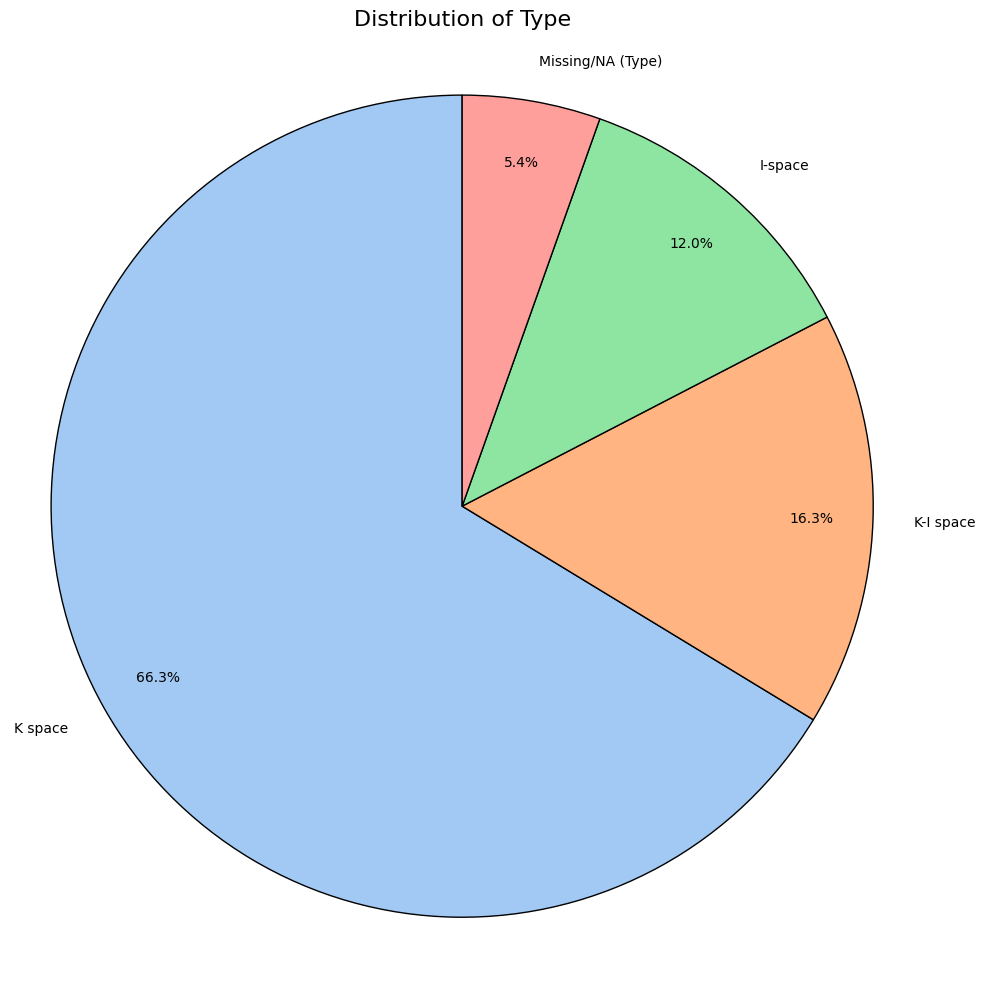

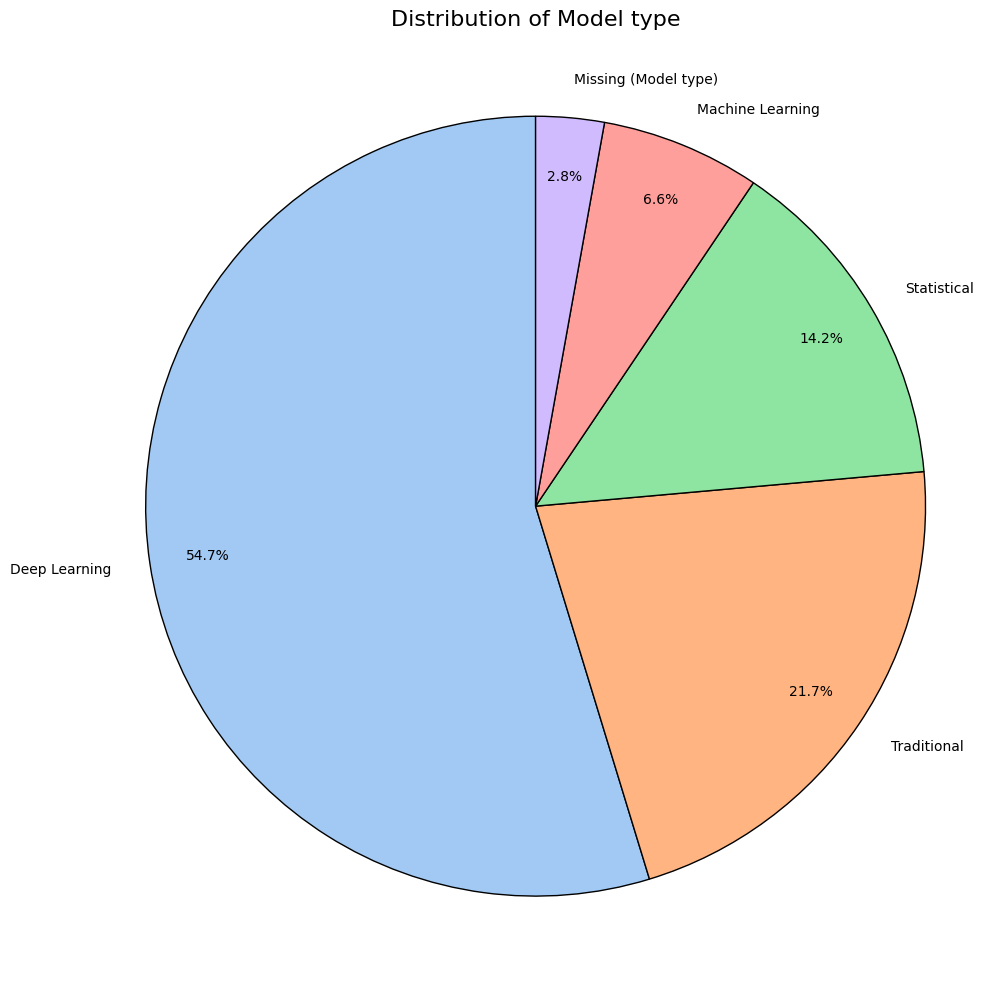

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_to_pie_chart = ['Type', 'Model type']

for col in columns_to_pie_chart:
    # Explode the list column to get individual items
    exploded_series = df[col].explode()

    # Count the frequency of each item
    frequencies = exploded_series.value_counts()

    # Filter out 'Missing', 'NA', or empty strings if they are not meaningful for plotting
    if '' in frequencies.index:
        frequencies = frequencies.drop('')
    if 'Missing' in frequencies.index:
        frequencies = frequencies.drop('Missing')
    if 'NA' in frequencies.index:
        frequencies = frequencies.drop('NA')

    if not frequencies.empty:
        plt.figure(figsize=(8, 8))
        plt.pie(frequencies.values, labels=frequencies.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
        plt.title(f'Distribution of {col}')
        plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()
        plt.show()
    else:
        print(f"No meaningful data to plot for column: {col} after filtering 'Missing' or empty values.")

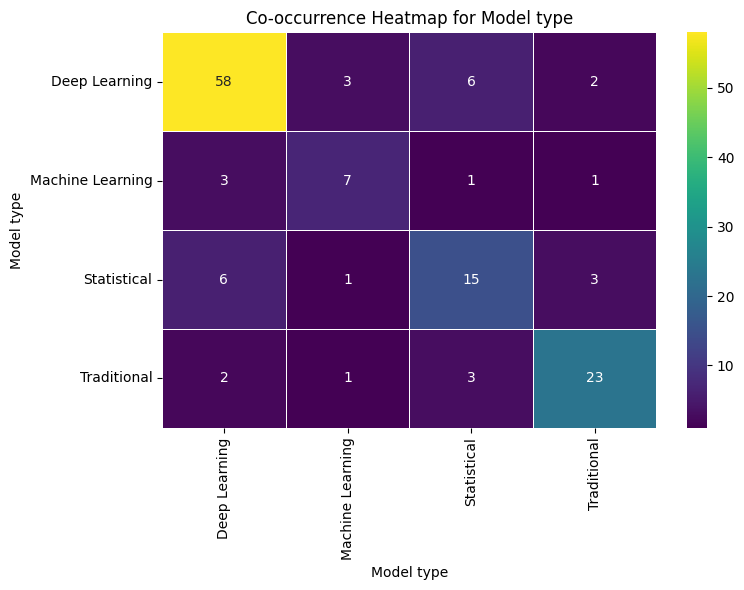

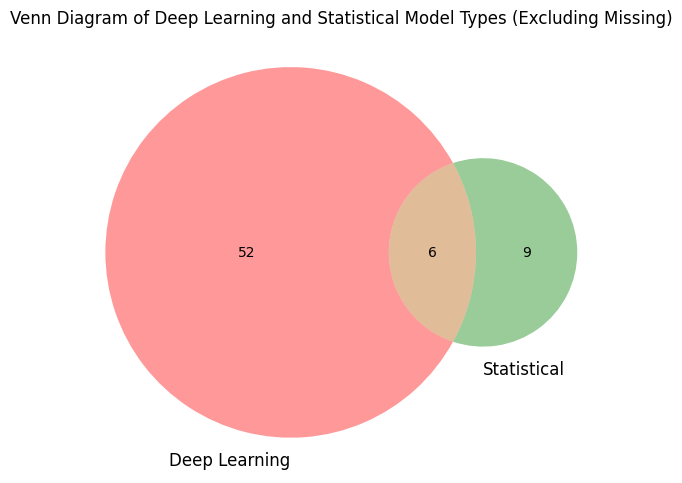

In [96]:
# The 'Model type' co-occurrence matrix has already been generated and can be accessed from the 'cooccurrence_matrices' dictionary.
# A heatmap is a suitable visualization for showing co-occurrence among multiple items.
# Re-displaying the heatmap for 'Model type':

import matplotlib.pyplot as plt
import seaborn as sns
#
# model_type_matrix = cooccurrence_matrices.get('Model type')
#
if model_type_matrix is not None and not model_type_matrix.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(model_type_matrix, annot=True, fmt="d", cmap="viridis", linewidths=.5)
    plt.title('Co-occurrence Heatmap for Model type')
    plt.xlabel('Model type')
    plt.ylabel('Model type')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Co-occurrence matrix for 'Model type' not found or is empty.")

# Venn diagram for 2 model types, ignoring 'Missing':
# First, ensure 'matplotlib_venn' is installed
# !pip install matplotlib-venn

from matplotlib_venn import venn2
from matplotlib import pyplot as plt

# Filter out 'Missing' values from the 'Model type' column before creating sets
df_filtered_model_type = df[df['Model type'].apply(lambda x: 'Missing' not in x)]

dl_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Deep Learning' in x)].index)
stat_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Statistical' in x)].index)

plt.figure(figsize=(7, 7))
venn2([dl_set, stat_set], ('Deep Learning', 'Statistical'))
plt.title('Venn Diagram of Deep Learning and Statistical Model Types (Excluding Missing)')
plt.show()

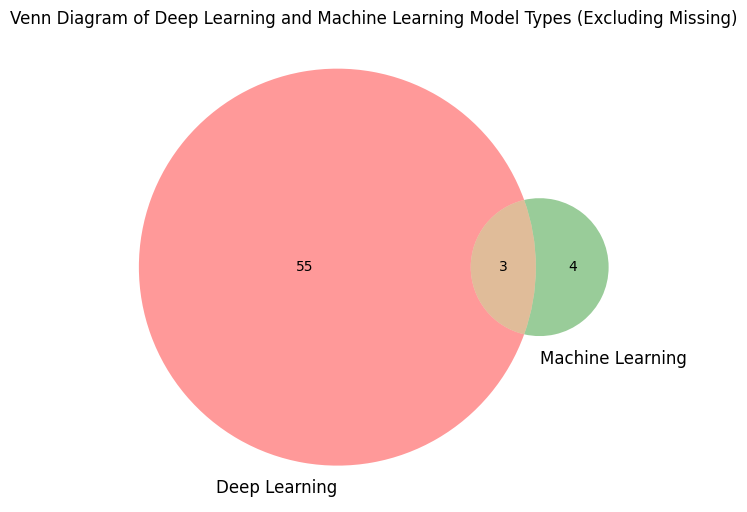

In [97]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

# Assuming df_filtered_model_type was already created in a previous step
# df_filtered_model_type = df[df['Model type'].apply(lambda x: 'Missing' not in x)]

dl_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Deep Learning' in x)].index)
ml_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Machine Learning' in x)].index)

plt.figure(figsize=(7, 7))
venn2([dl_set, ml_set], ('Deep Learning', 'Machine Learning'))
plt.title('Venn Diagram of Deep Learning and Machine Learning Model Types (Excluding Missing)')
plt.show()